In [2]:
#Importing libraries
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import metrics
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import f1_score,precision_score, recall_score

### **Loading Data**

In [3]:
data = pd.read_csv('Mileage1.csv')
data.head()

,Car_Make,Car_Model,Year,Engine,Horsepower,Weight,Fuel_Type,Transmission,Drive_Mode,Type_road,Driving_Style,Predicted_Mileage
0,Hyundai,Creta,2021,1497,113,1280,Diesel,Automatic,AWD,Highway,Normal,14
1,Hyundai,Creta,2021,1497,113,1280,Diesel,Automatic,AWD,Highway,Aggressive,12
2,Tata,Nexon,2023,1497,108,1305,Diesel,Manual,AWD,Highway,Normal,19
3,Hyundai,Alcazar,2024,1497,113,1450,Diesel,Automatic,AWD,City,Normal,12
4,Hyundai,Alcazar,2024,1497,113,1450,Diesel,Automatic,AWD,City,Aggressive,10


In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
#no of rows and columns
data.shape

(418, 12)

In [6]:
#getting info about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_Make           418 non-null    object
 1   Car_Model          418 non-null    object
 2   Year               418 non-null    int64 
 3   Engine             418 non-null    int64 
 4   Horsepower         418 non-null    int64 
 5   Weight             418 non-null    int64 
 6   Fuel_Type          418 non-null    object
 7   Transmission       418 non-null    object
 8   Drive_Mode         418 non-null    object
 9   Type_road          418 non-null    object
 10  Driving_Style      418 non-null    object
 11  Predicted_Mileage  418 non-null    int64 
dtypes: int64(5), object(7)
memory usage: 39.3+ KB


In [7]:
#for first 5 rows
data.head()

,Car_Make,Car_Model,Year,Engine,Horsepower,Weight,Fuel_Type,Transmission,Drive_Mode,Type_road,Driving_Style,Predicted_Mileage
0,Hyundai,Creta,2021,1497,113,1280,Diesel,Automatic,AWD,Highway,Normal,14
1,Hyundai,Creta,2021,1497,113,1280,Diesel,Automatic,AWD,Highway,Aggressive,12
2,Tata,Nexon,2023,1497,108,1305,Diesel,Manual,AWD,Highway,Normal,19
3,Hyundai,Alcazar,2024,1497,113,1450,Diesel,Automatic,AWD,City,Normal,12
4,Hyundai,Alcazar,2024,1497,113,1450,Diesel,Automatic,AWD,City,Aggressive,10


In [8]:
#for last 5 rows
data.tail()

,Car_Make,Car_Model,Year,Engine,Horsepower,Weight,Fuel_Type,Transmission,Drive_Mode,Type_road,Driving_Style,Predicted_Mileage
413,Tata,Harrier,2024,1956,168,1675,Diesel,Automatic,AWD,City,Aggressive,12
414,Honda,WR-V,2024,1199,88,1104,Petrol,Manual,FWD,Highway,Aggressive,13
415,Hyundai,Venue,2024,1497,113,1280,Diesel,Automatic,AWD,Highway,Normal,18
416,Mahindra,XUV300,2024,1197,110,1235,Diesel,Manual,FWD,Highway,Normal,21
417,Maruti,S-Presso,2024,998,67,726,Petrol,Manual,FWD,City,Normal,16


In [9]:
#statistical measures about the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,418.0,2019.830144,3.196573,2013.0,2018.0,2020.0,2023.00,2024.0
Engine,418.0,1373.088517,432.831583,0.0,1197.0,1199.0,1497.75,2184.0
Horsepower,418.0,101.858852,33.303800,37.0,81.0,88.0,119.00,200.0
Weight,418.0,1209.255981,362.119519,615.0,915.0,1125.0,1450.00,2510.0
Predicted_Mileage,418.0,16.011962,3.827497,8.0,13.0,16.0,19.00,29.0


In [10]:
##feature engineering
#To get null values of column
data.isnull().sum()

Car_Make             0
Car_Model            0
Year                 0
Engine               0
Horsepower           0
Weight               0
Fuel_Type            0
Transmission         0
Drive_Mode           0
Type_road            0
Driving_Style        0
Predicted_Mileage    0
dtype: int64

<Axes: >

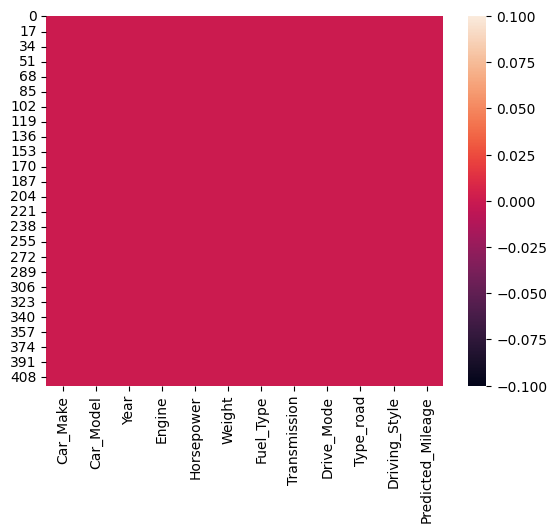

In [11]:
#heatmap to show null values
sns.heatmap(data.isnull())
#as dataset don't have any null value so it is showing the red colour which is 0.0 according to scale

In [12]:
data.dtypes

Car_Make             object
Car_Model            object
Year                  int64
Engine                int64
Horsepower            int64
Weight                int64
Fuel_Type            object
Transmission         object
Drive_Mode           object
Type_road            object
Driving_Style        object
Predicted_Mileage     int64
dtype: object

### **Data Cleaning And Visualization**

In [13]:
data = data.drop('Car_Model', axis=1)
data.head()

,Car_Make,Year,Engine,Horsepower,Weight,Fuel_Type,Transmission,Drive_Mode,Type_road,Driving_Style,Predicted_Mileage
0,Hyundai,2021,1497,113,1280,Diesel,Automatic,AWD,Highway,Normal,14
1,Hyundai,2021,1497,113,1280,Diesel,Automatic,AWD,Highway,Aggressive,12
2,Tata,2023,1497,108,1305,Diesel,Manual,AWD,Highway,Normal,19
3,Hyundai,2024,1497,113,1450,Diesel,Automatic,AWD,City,Normal,12
4,Hyundai,2024,1497,113,1450,Diesel,Automatic,AWD,City,Aggressive,10


In [14]:
data.duplicated().sum()

5

In [15]:
data.drop_duplicates(inplace=True)

In [16]:
data.shape

(413, 11)

In [17]:
for col in data.columns:
    print('Unique values of ' + col)
    print(data[col].unique())
    print("======================")

Unique values of Car_Make
['Hyundai' 'Tata' 'Honda' 'Mahindra' 'Maruti']
Unique values of Year
[2021 2023 2024 2013 2014 2015 2016 2017 2018 2019 2020 2022]
Unique values of Engine
[1497 1199 1997  998 1198 1462 2179 1461  814  624 1197    0 1196 1498
 1799 1956 1993 1193 1086 1248 2184  796 1200 2157]
Unique values of Horsepower
[113 108  88 152  67 103 138  65  55  37 110  81  74 118  72 127 119  82
 168 187 140  84 153 117 121  68  83  97  86 130  89 154  47  41 200 178
 120 167]
Unique values of Weight
[1280 1305 1450 1114 1620 1050  915  965 1205 1910 1630  765  795  615
  726 1235  865 1125 1820 1104  928 1400  805 1157 1090 1065  830 1283
  940  870 1825 1610 1890 1032  935 1800 1055  855 1650  910  905 1675
 1080 1260 1085 1170 1036  880 1295  815 1110 1750 1660 1635 1020  740
 1150 1060 1785 1135 1970 1180 1012 1010 1026 2380 2440  920 2510 1900
 2410]
Unique values of Fuel_Type
['Diesel' 'Petrol' 'Electric']
Unique values of Transmission
['Automatic' 'Manual' 'CVT']
Unique va

In [18]:
data['Car_Make'].value_counts()

Car_Make
Maruti      93
Honda       84
Mahindra    83
Tata        81
Hyundai     72
Name: count, dtype: int64

In [46]:
data['Car_Make'].replace(['Maruti', 'Hyundai', 'Tata', 'Honda', 'Toyota',
       'Volkswagen', 'Kia', 'Ford', 'Mahindra', 'Renault', 'Nissan',
       'Mercedes-Benz', 'BMW', 'Jaguar', 'Lexus', 'Audi', 'Porsche',
       'Aston Martin', 'Maserati', 'Bentley', 'Rolls-Royce',
       'Lamborghini', 'Ferrari', 'McLaren', 'Bugatti', 'Volvo',
       'Land Rover'],
                          [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]
                          ,inplace=True)

In [47]:
data['Car_Make'].unique

<bound method Series.unique of 0      2
1      2
2      3
3      2
4      2
      ..
413    3
414    4
415    2
416    9
417    1
Name: Car_Make, Length: 413, dtype: int64>

In [20]:
data['Fuel_Type'].value_counts()

Fuel_Type
Petrol      281
Diesel      122
Electric     10
Name: count, dtype: int64

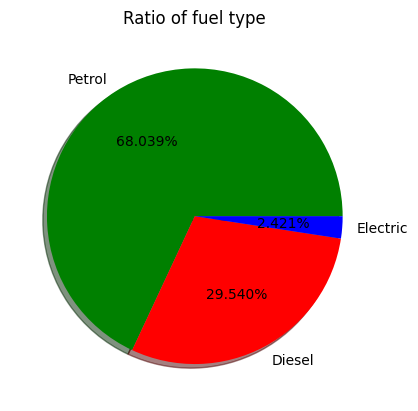

In [21]:
#To show the Fuel type using pie chart
plt.pie(x = data['Fuel_Type'].value_counts() ,autopct='%1.3f%%' ,labels=['Petrol', 'Diesel','Electric'], colors=['green', 'red','Blue'], shadow=True)
plt.title('Ratio of fuel type')
plt.show()


In [22]:
data['Transmission'].value_counts()

Transmission
Manual       278
Automatic     93
CVT           42
Name: count, dtype: int64

<Axes: xlabel='Transmission', ylabel='count'>

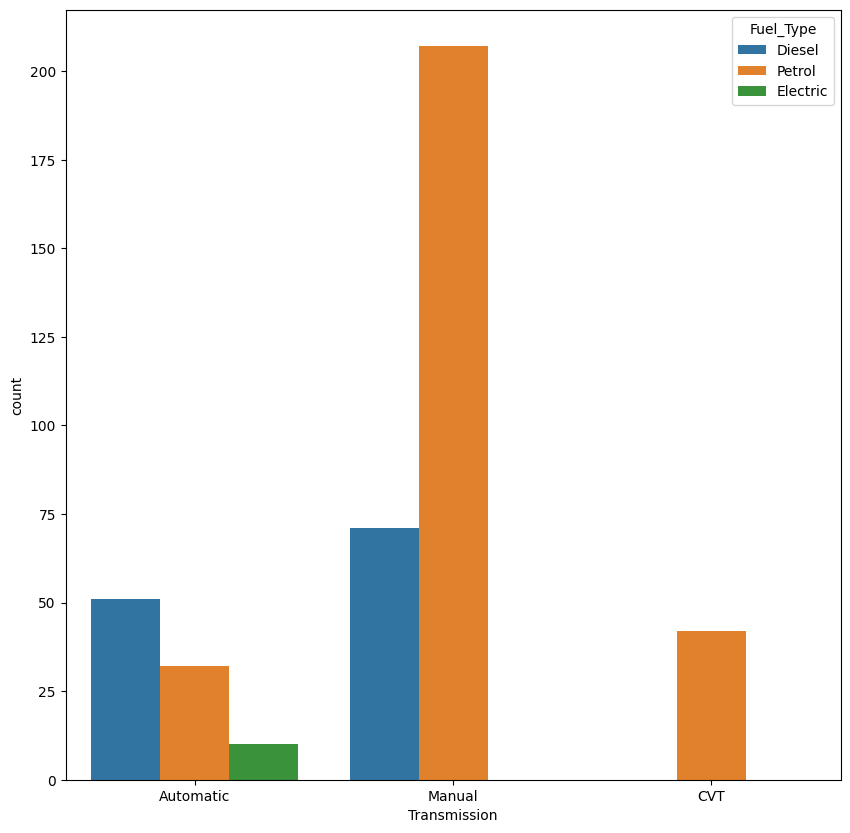

In [24]:
#count graph for heart disease vs Thallium
plt.figure(figsize=(10,10))
sns.countplot(data=data,hue='Fuel_Type',x='Transmission')

In [25]:
data['Drive_Mode'].unique()

array(['AWD', 'FWD', '4WD', 'RWD'], dtype=object)

In [38]:
data['Type_road'].unique()

array([1, 2], dtype=int64)

In [39]:
data['Driving_Style'].unique()

array([1, 2], dtype=int64)

In [40]:
#encoding the categorial transmission column
data.replace({'Transmission':{'Automatic':1,'Manual':2, 'CVT':3}},inplace=True)

#encoding the categorial Fuel type column
data.replace({'Fuel_Type':{'Petrol':1,'Diesel':2,'Electric':3}},inplace=True)

#encoding the categorial Drive Mmde column
data.replace({'Drive_Mode':{'FWD':1,'RWD':2,'4WD':3,'AWD':4}},inplace=True)
#encoding the categorial Drive Mmde column
data.replace({'Type_road':{'Highway':1,'City':2}},inplace=True)
#encoding the categorial Drive Mmde column
data.replace({'Driving_Style':{'Normal':1,'Aggressive':2}},inplace=True)

In [41]:
data["Fuel_Type"].value_counts

<bound method IndexOpsMixin.value_counts of 0      2
1      2
2      2
3      2
4      2
      ..
413    2
414    1
415    2
416    2
417    1
Name: Fuel_Type, Length: 413, dtype: int64>

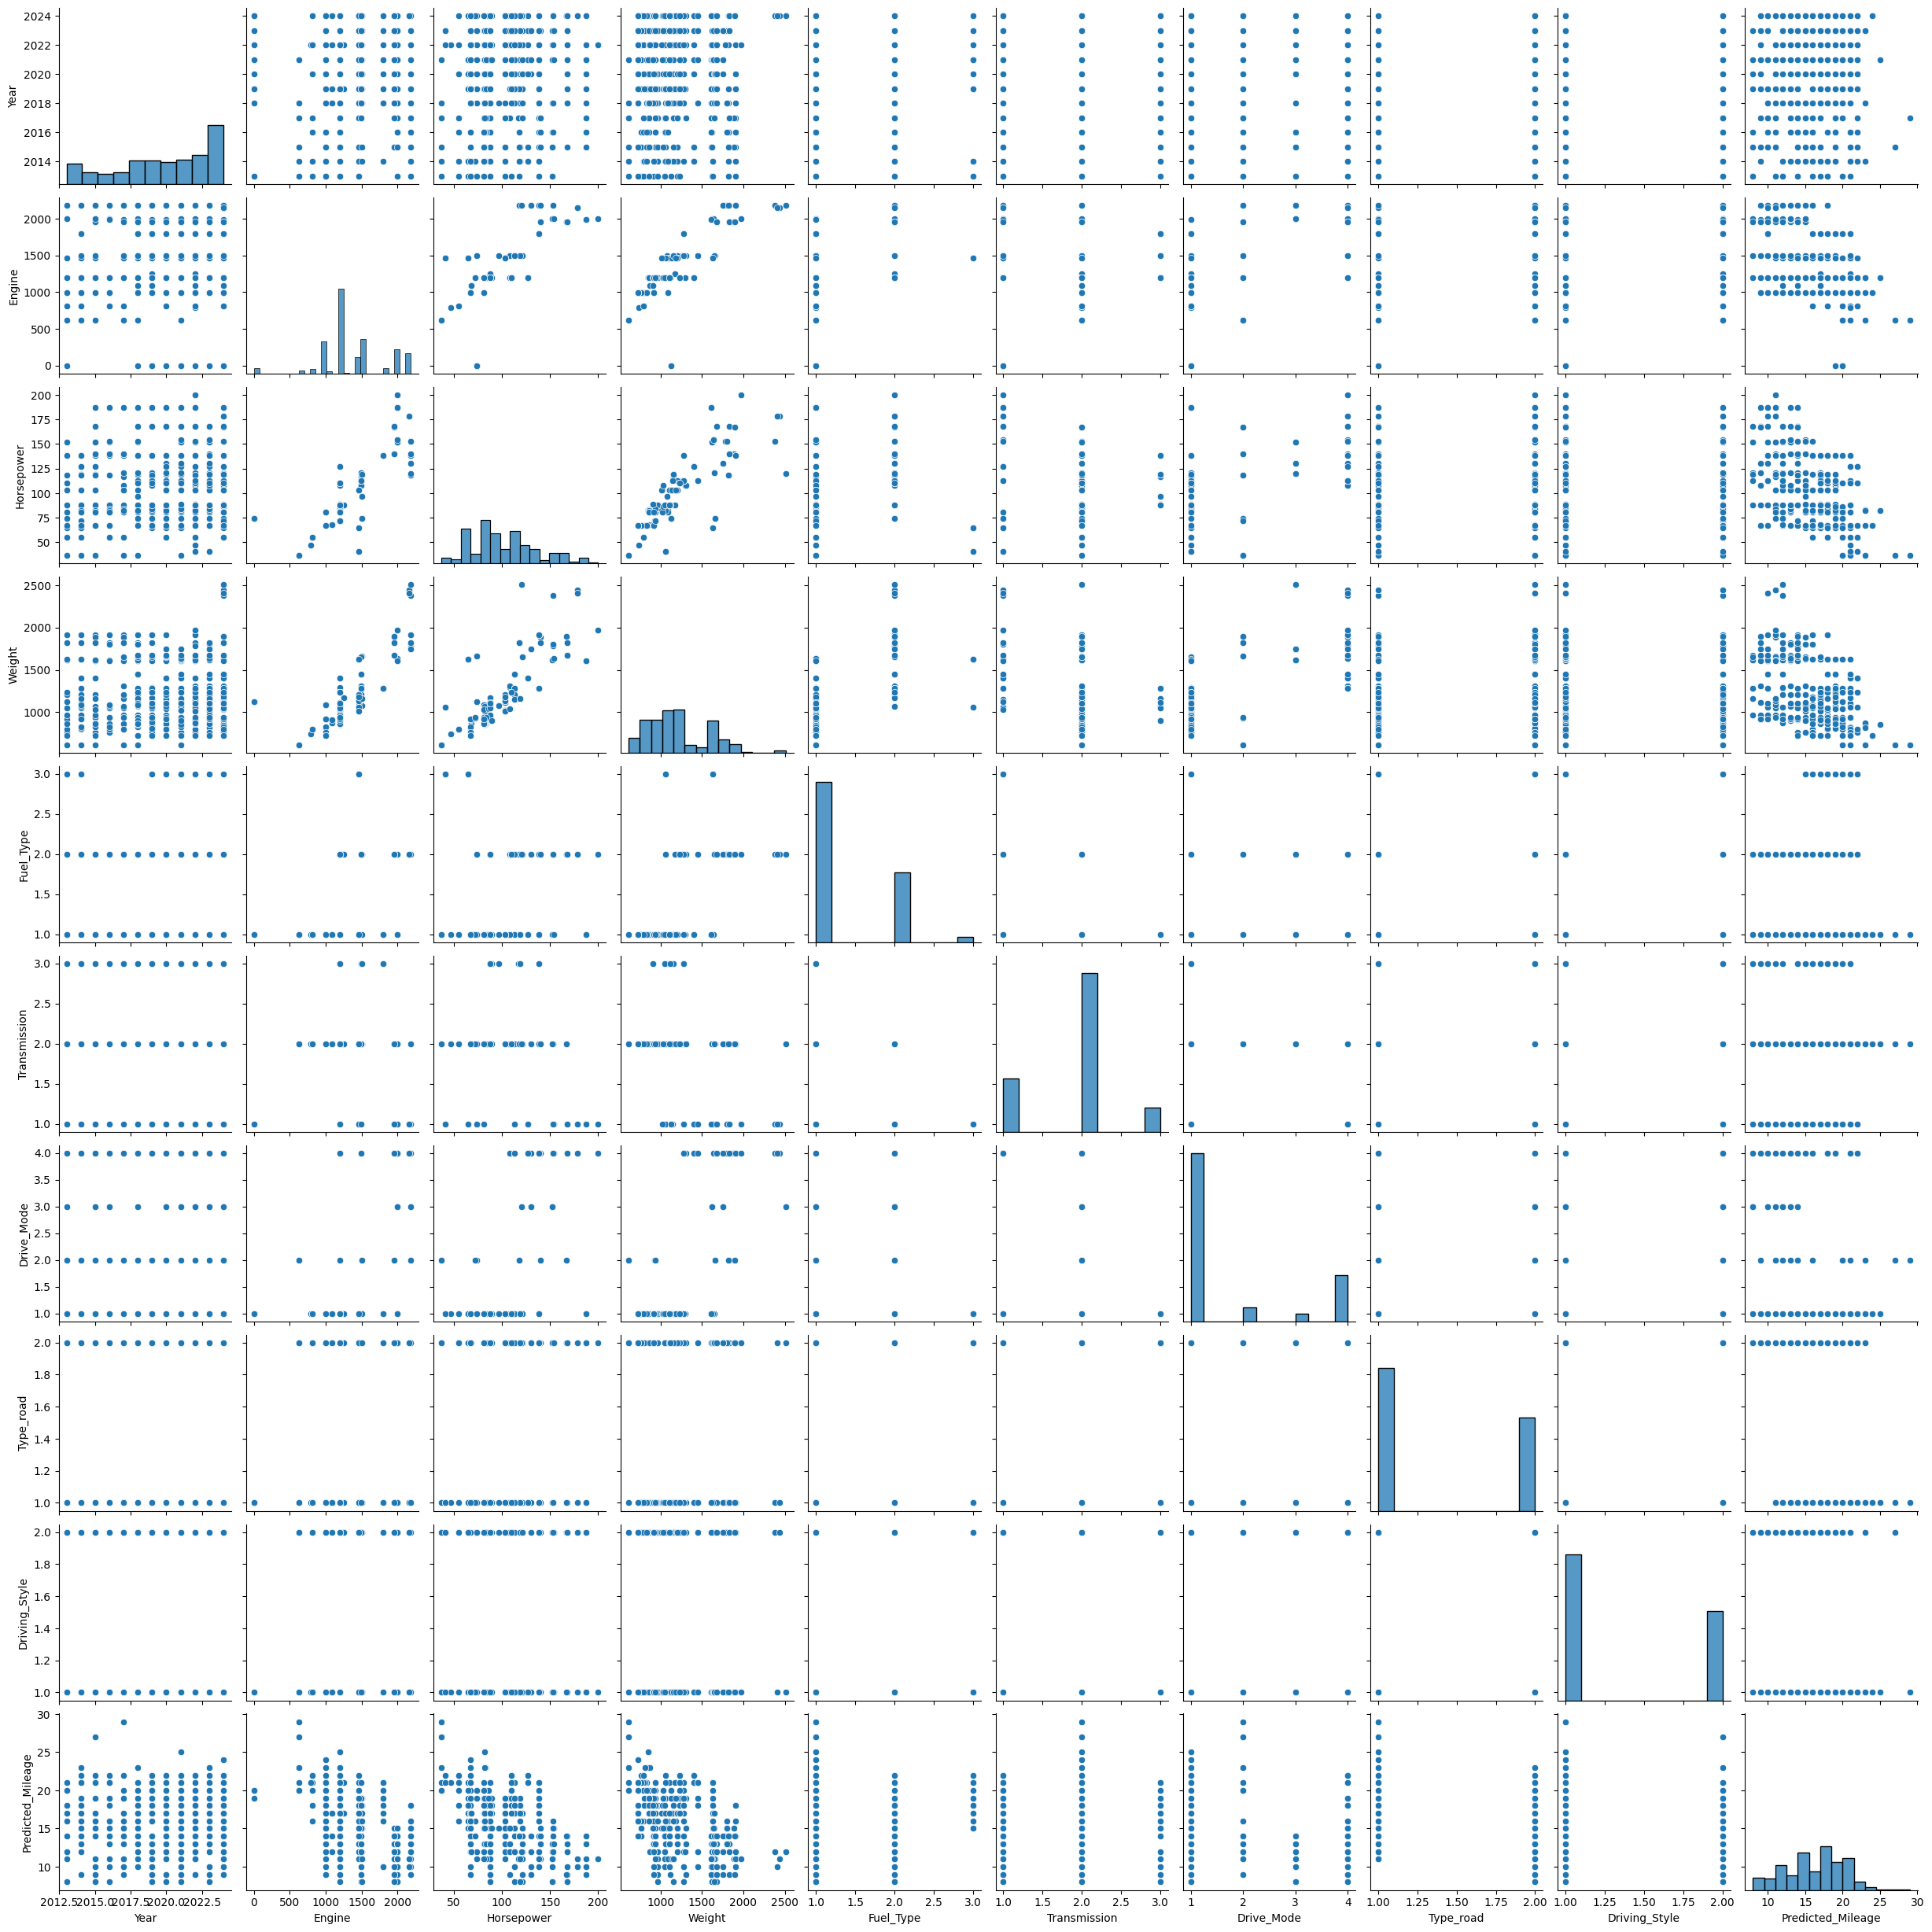

In [42]:
sns.pairplot(data)
# This shows the relationship for (n,2) combination of variable in a DataFrame 
# as a matrix of plots and the diagonal plots are the univariate plots.

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Engine'}>,
        <Axes: title={'center': 'Horsepower'}>],
       [<Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'Fuel_Type'}>,
        <Axes: title={'center': 'Transmission'}>],
       [<Axes: title={'center': 'Drive_Mode'}>,
        <Axes: title={'center': 'Type_road'}>,
        <Axes: title={'center': 'Driving_Style'}>],
       [<Axes: title={'center': 'Predicted_Mileage'}>, <Axes: >,
        <Axes: >]], dtype=object)

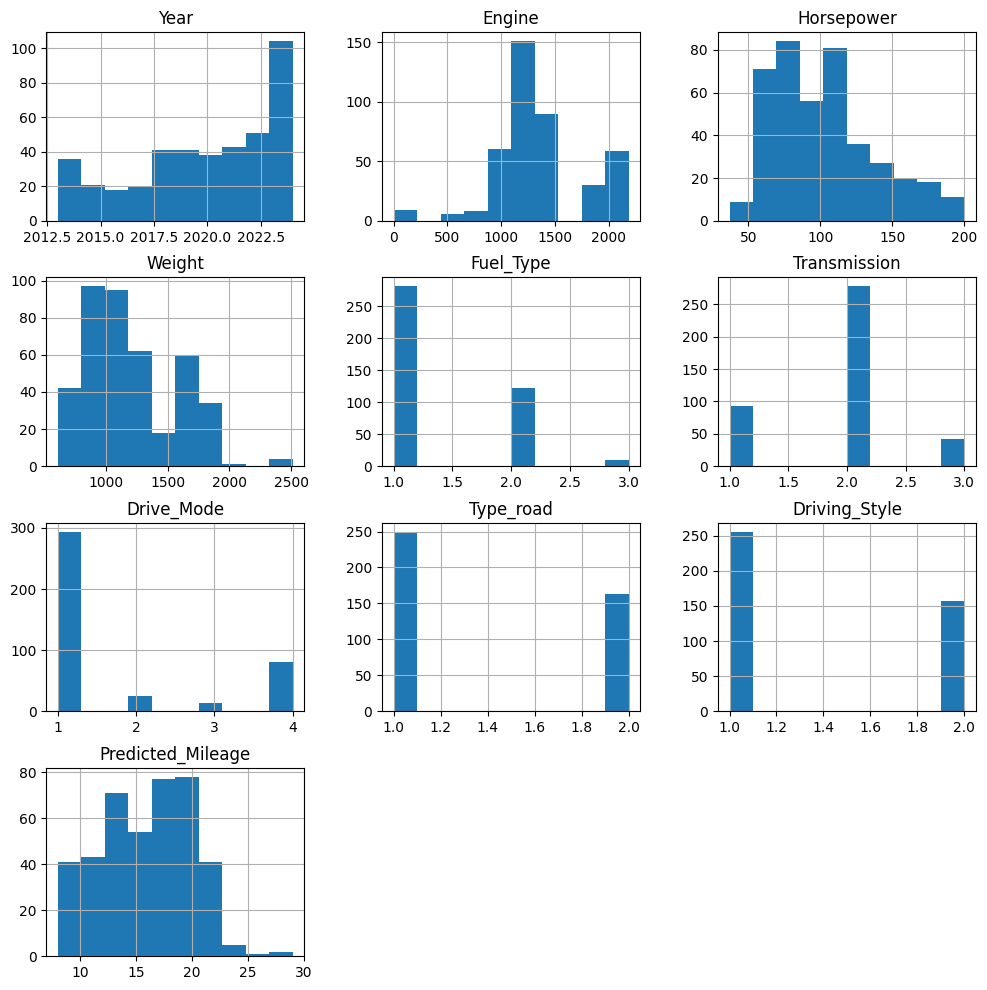

In [43]:
#to visualize the feature using histogram
data.hist(figsize=(12,12))

In [48]:
print(data.corr())


                   Car_Make      Year    Engine  Horsepower    Weight  \
Car_Make           1.000000 -0.029124  0.394589    0.323484  0.559134   
Year              -0.029124  1.000000  0.015522    0.080524  0.041509   
Engine             0.394589  0.015522  1.000000    0.812907  0.809200   
Horsepower         0.323484  0.080524  0.812907    1.000000  0.807562   
Weight             0.559134  0.041509  0.809200    0.807562  1.000000   
Fuel_Type          0.483224  0.061400  0.483577    0.330216  0.660844   
Transmission      -0.004615 -0.087884 -0.101314   -0.262904 -0.356433   
Drive_Mode         0.074141  0.066058  0.545888    0.572795  0.626975   
Type_road          0.040764 -0.115142  0.089800    0.060922  0.069504   
Driving_Style      0.047626  0.014661  0.036995   -0.025698  0.001360   
Predicted_Mileage -0.263526 -0.007740 -0.496546   -0.480731 -0.464734   

                   Fuel_Type  Transmission  Drive_Mode  Type_road  \
Car_Make            0.483224     -0.004615    0.074141

<Axes: >

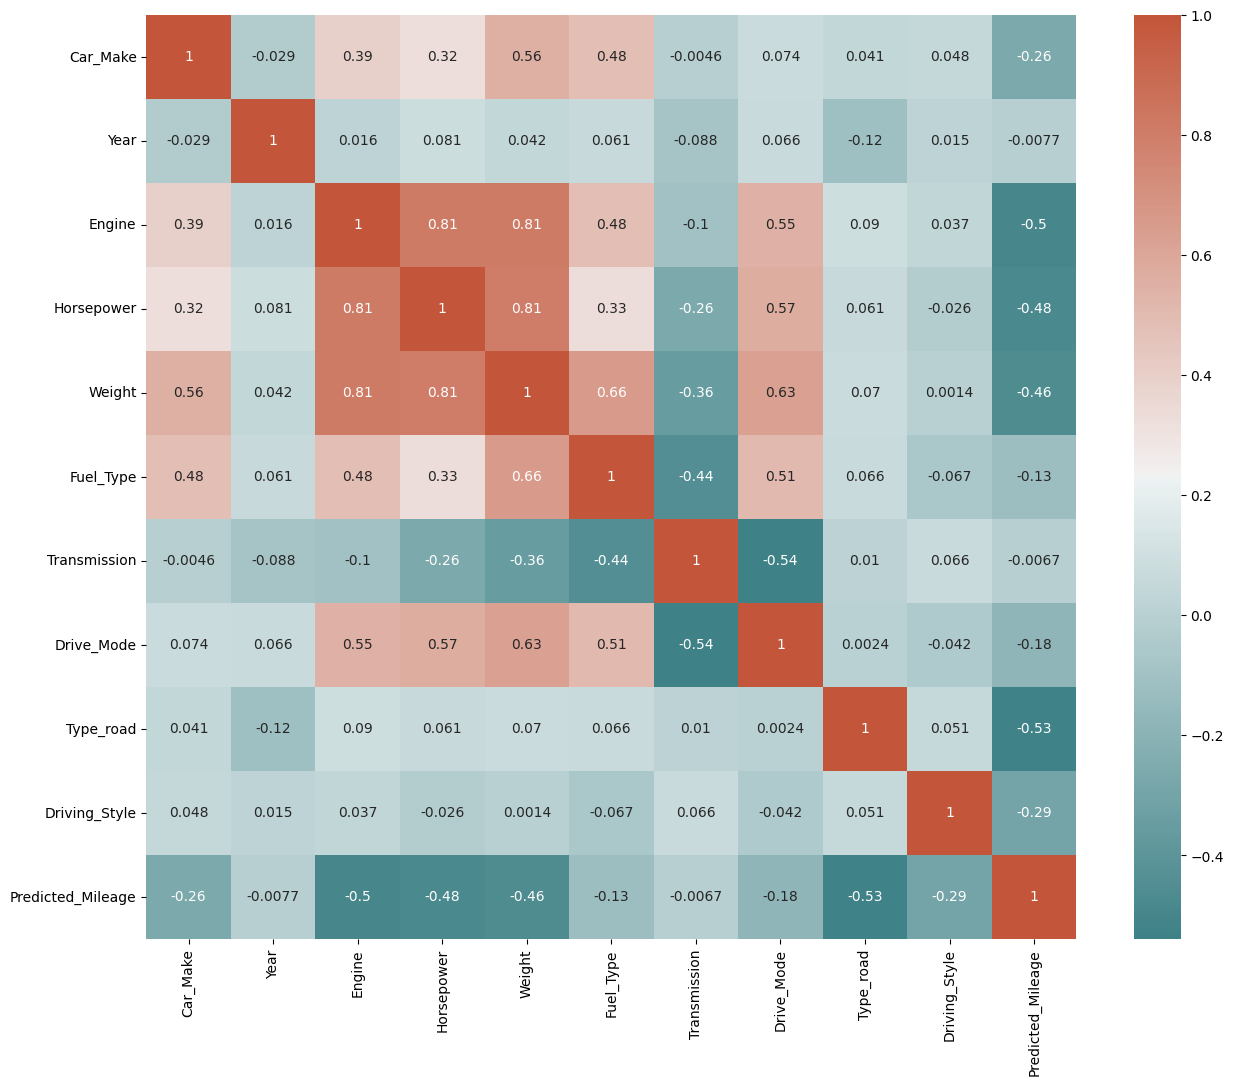

In [49]:
#correlation matrix
#it is to find the dependency of column to target value
corr = data.corr()
plt.subplots(figsize=(15,12))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(200, 20, as_cmap=True))

In [50]:
#statistical measures about the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Car_Make,413.0,3.784504,2.813724,1.0,2.0,3.0,4.0,9.0
Year,413.0,2019.806295,3.205920,2013.0,2018.0,2020.0,2023.0,2024.0
Engine,413.0,1371.924939,434.243396,0.0,1197.0,1199.0,1498.0,2184.0
Horsepower,413.0,101.728814,33.314318,37.0,81.0,88.0,119.0,200.0
Weight,413.0,1208.280872,363.096137,615.0,915.0,1125.0,1450.0,2510.0
Fuel_Type,413.0,1.343826,0.524119,1.0,1.0,1.0,2.0,3.0
Transmission,413.0,1.876513,0.558913,1.0,2.0,2.0,2.0,3.0
Drive_Mode,413.0,1.714286,1.205052,1.0,1.0,1.0,2.0,4.0
Type_road,413.0,1.394673,0.489373,1.0,1.0,1.0,2.0,2.0
Driving_Style,413.0,1.380145,0.486011,1.0,1.0,1.0,2.0,2.0


In [51]:
for col in data.columns:
    print('------------')
    print(col)
    print(data[col].unique())

------------
Car_Make
[2 3 4 9 1]
------------
Year
[2021 2023 2024 2013 2014 2015 2016 2017 2018 2019 2020 2022]
------------
Engine
[1497 1199 1997  998 1198 1462 2179 1461  814  624 1197    0 1196 1498
 1799 1956 1993 1193 1086 1248 2184  796 1200 2157]
------------
Horsepower
[113 108  88 152  67 103 138  65  55  37 110  81  74 118  72 127 119  82
 168 187 140  84 153 117 121  68  83  97  86 130  89 154  47  41 200 178
 120 167]
------------
Weight
[1280 1305 1450 1114 1620 1050  915  965 1205 1910 1630  765  795  615
  726 1235  865 1125 1820 1104  928 1400  805 1157 1090 1065  830 1283
  940  870 1825 1610 1890 1032  935 1800 1055  855 1650  910  905 1675
 1080 1260 1085 1170 1036  880 1295  815 1110 1750 1660 1635 1020  740
 1150 1060 1785 1135 1970 1180 1012 1010 1026 2380 2440  920 2510 1900
 2410]
------------
Fuel_Type
[2 1 3]
------------
Transmission
[1 2 3]
------------
Drive_Mode
[4 1 3 2]
------------
Type_road
[1 2]
------------
Driving_Style
[1 2]
------------
Predict

In [52]:
#Training and testing
X = data.iloc[:,:-1]
y = data['Predicted_Mileage']

In [53]:
#Spliting the data
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=5)

In [54]:
print("Shape of X_train",X_train.shape)
print("Shape of y_train",y_train.shape)
print("Shape of X_test",X_test.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train (330, 10)
Shape of y_train (330,)
Shape of X_test (83, 10)
Shape of y_test (83,)


In [55]:
#Linear Regression
from sklearn.linear_model import LinearRegression
print("Linear Regression")
lr_model=LinearRegression()
#training the linear regression model with training data
lr_model.fit(X_train,y_train)
lr_pred = lr_model.predict(X_test)


#prediction on training set
lr_train_pred = lr_model.predict(X_train)

#r2 score on training set
score1=metrics.r2_score(y_train,lr_train_pred)

#MAE
mae=metrics.mean_absolute_error(y_train,lr_train_pred)

print("R2 score on training data : ",score1*100)
print("Mean absolute error on training set : ",mae)


#prediction on test set
lr_test_pred = lr_model.predict(X_train)

#r2 score on training set
score2=metrics.r2_score(y_train,lr_test_pred)

#MAE
mae1=metrics.mean_absolute_error(y_train,lr_test_pred)

print("R2 score on test data : ",score2*100)
print("Mean absolute error on test set : ",mae1)


accuracy = lr_model.score(X_test,y_test)
print("Accuracy of Linear Regression model ",accuracy*100,'%')
print("y-intercept = ",lr_model.intercept_)
print("beta coefficients in same order as passed",lr_model.coef_)


Linear Regression
R2 score on training data :  60.03303108719067
Mean absolute error on training set :  1.8825573091315384
R2 score on test data :  60.03303108719067
Mean absolute error on test set :  1.8825573091315384
Accuracy of Linear Regression model  67.87159572081369 %
y-intercept =  189.90241911069967
beta coefficients in same order as passed [-6.82825153e-03 -7.90745002e-02 -1.63560541e-03 -1.48494404e-02
 -4.02904191e-03  1.58078761e+00 -1.56692082e-01  3.71416608e-01
 -3.90040847e+00 -1.88050461e+00]


In [56]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, lr_pred)))
print("Mean squared error =", round(sm.mean_squared_error(y_test, lr_pred)) )


Mean absolute error = 2
Mean squared error = 5


In [57]:
#KNN
print("KNN")
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
accuracy = knn.score(X_test,y_test)
print("Accuracy of KNN model ",accuracy*100,'%')

KNN
Accuracy of KNN model  56.39808180967118 %


In [58]:
##Random Forest classification
print("Random forest classification")
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=120, min_samples_split=2, min_samples_leaf=1,  max_depth=20)
rf_model.fit(X_train,y_train)
rf_model.score(X_test,y_test)

Random forest classification


0.8079929891863623

In [59]:
#All Model Accuracy with Visual------6 models
Algo=[knn,lr_model,rf_model]
Scores=[]
for K in Algo:
  K.fit(X_train,y_train)
  Scores.append(K.score(X_test,y_test)*100)
Algo=["K Neighbors","Linear Regression","Random Forest"]
Table=pd.DataFrame()
Table['Algorithms']=Algo
Table['Accuracy']=Scores
Table

,Algorithms,Accuracy
0,K Neighbors,56.398082
1,Linear Regression,67.871596
2,Random Forest,80.684240


<Axes: xlabel='Algorithms', ylabel='Accuracy'>

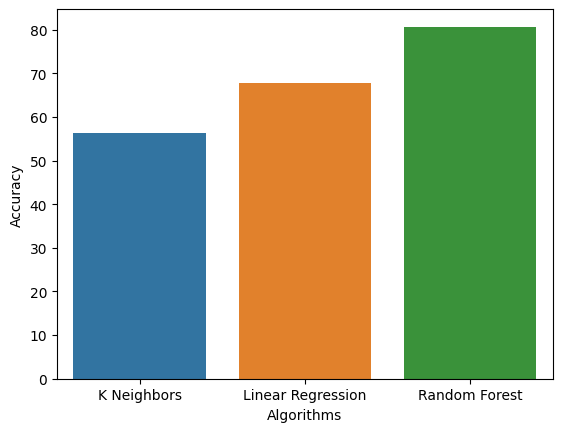

In [60]:
#Graph to show accuracy of the models
sns.barplot(x='Algorithms',y='Accuracy',data=Table)

### **Exporting the tested model to a pickle file**

In [61]:
import pickle
with open('car_mileage1.pkl', 'wb') as file:
  # dump information to that file
  pickle.dump(rf_model, file)

In [62]:
data.head()

,Car_Make,Year,Engine,Horsepower,Weight,Fuel_Type,Transmission,Drive_Mode,Type_road,Driving_Style,Predicted_Mileage
0,2,2021,1497,113,1280,2,1,4,1,1,14
1,2,2021,1497,113,1280,2,1,4,1,2,12
2,3,2023,1497,108,1305,2,2,4,1,1,19
3,2,2024,1497,113,1450,2,1,4,2,1,12
4,2,2024,1497,113,1450,2,1,4,2,2,10


In [64]:
input_data=([2,2021,1497,113,1280,2,1,4,1,2])
#changing the input into numpy array and reshaping
input_change=np.array(input_data).reshape(1,-1)
#std_input=sc.transform(input_change)
pred=rf_model.predict(input_change)
print(f"Mileage of your car is {pred[0]} KPL")

Mileage of your car is 14.445 KPL


In [67]:
input_data=([2,2021,1497,113,1280,2,1,4,1,2])
#changing the input into numpy array and reshaping
input_change=np.array(input_data).reshape(1,-1)
#standardize the input
#std_input=sc.transform(input_change)
pred=knn.predict(input_change)
#pred=lr_model.predict(std_input)
print(f"Mileage of your car is {pred[0]} KPL")

Mileage of your car is 15.4 KPL
